In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

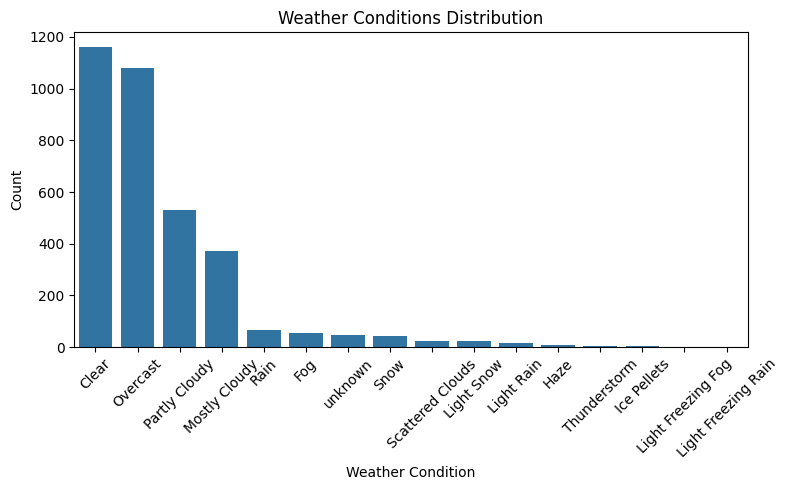

In [39]:
file_path = '../data/modified_data/Cleaned Dataset.csv'  
data = pd.read_csv(file_path)

data['dec.temperature'] = pd.to_numeric(data['dec.temperature'], errors='coerce')

weather_counts = data['dec.weather.condition'].value_counts()

temperature_distribution = data['dec.temperature'].dropna()
temperature_filtered = temperature_distribution[temperature_distribution > -50]


steps_distribution = data['jbsteps60'].dropna()

plt.figure(figsize=(8, 5))
sns.barplot(x=weather_counts.index, y=weather_counts.values)
plt.title('Weather Conditions Distribution')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

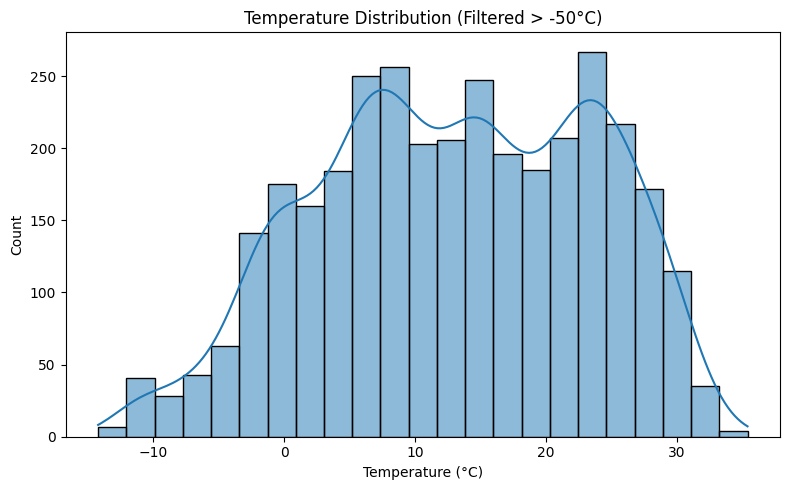

In [40]:
# Temperature distribution plot after filtering
plt.figure(figsize=(8, 5))
sns.histplot(temperature_filtered, kde=True)
plt.title('Temperature Distribution (Filtered > -50°C)')
plt.xlabel('Temperature (°C)')
plt.tight_layout()
plt.show()

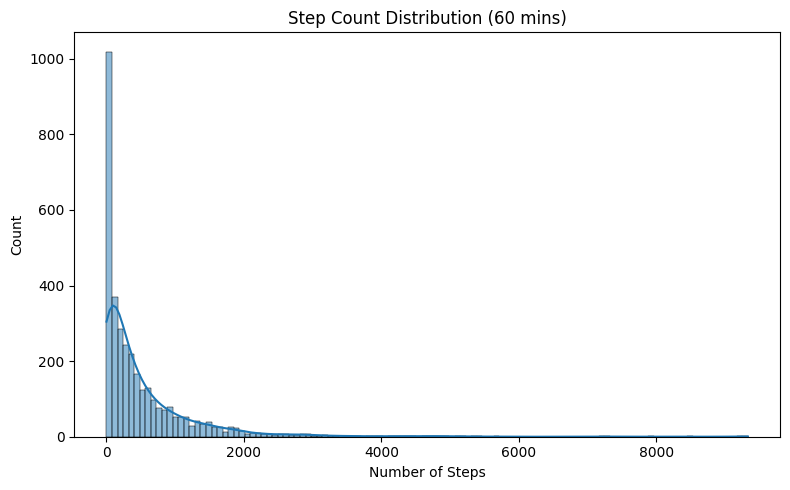

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(steps_distribution, kde=True)
plt.title('Step Count Distribution (60 mins)')
plt.xlabel('Number of Steps')
plt.tight_layout()
plt.show()

In [42]:
ranked_steps = data[['user.index', 'jbsteps60', 'jbmins60', 'sugg.decision.utime', 'dec.weather.condition', 'dec.temperature']].sort_values(by='jbsteps60', ascending=False)

ranked_steps.head(20)

,user.index,jbsteps60,jbmins60,sugg.decision.utime,dec.weather.condition,dec.temperature
2731,30,9330.0,58.0,2015-12-16 16:31:46,Overcast,5.4
2777,30,9209.0,60.0,2016-01-06 19:31:50,Clear,2.2
2781,30,9201.0,58.0,2016-01-09 16:33:25,Scattered Clouds,8.4
2742,30,8483.0,53.0,2015-12-20 19:31:51,Clear,5.8
2203,23,7896.0,54.0,2015-11-06 22:03:49,Overcast,11.0
2709,30,7291.0,44.0,2015-12-04 21:32:52,Clear,8.3
2634,28,7204.0,53.0,2015-11-17 23:01:01,Mostly Cloudy,14.2
1462,16,5696.0,43.0,2015-10-07 11:01:41,Mostly Cloudy,11.6
2004,21,5397.0,51.0,2015-12-03 19:33:51,Mostly Cloudy,5.9
1436,16,5359.0,51.0,2015-09-27 16:01:33,Overcast,25.6


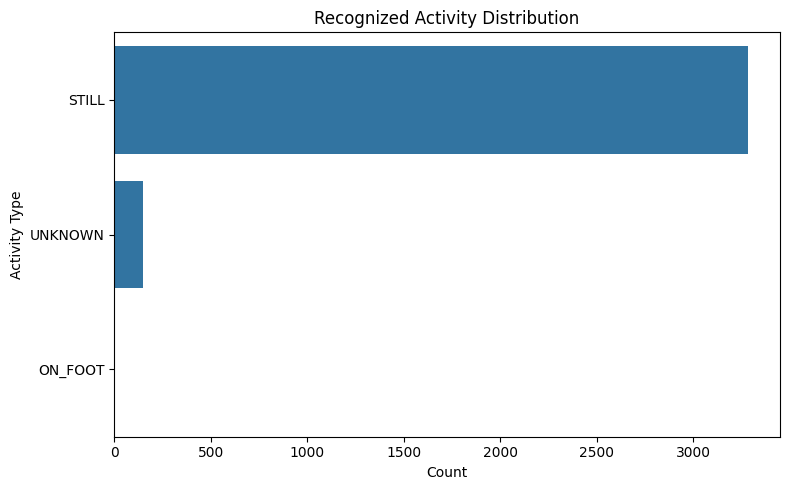

In [43]:
plt.figure(figsize=(8, 5))
sns.countplot(y=data['recognized.activity'])
plt.title('Recognized Activity Distribution')
plt.xlabel('Count')
plt.ylabel('Activity Type')
plt.tight_layout()
plt.show()

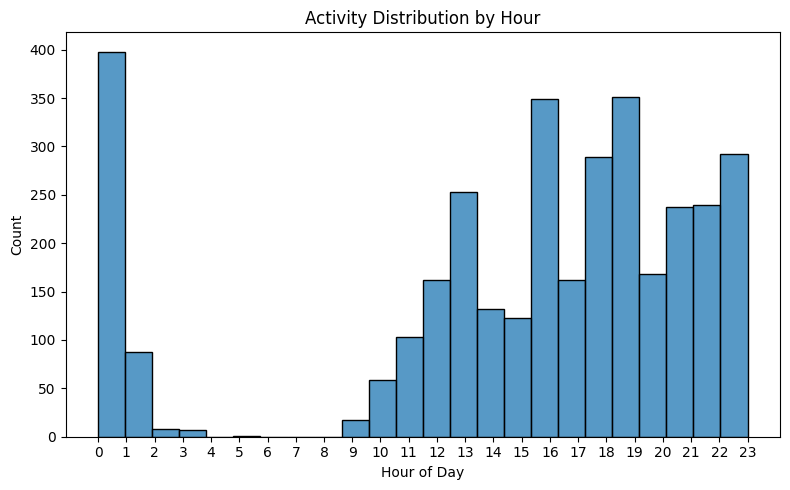

In [44]:
data['Time of Day'] = pd.to_datetime(data['Time of Day'], format='%H:%M:%S', errors='coerce')

data['hour'] = data['Time of Day'].dt.hour

plt.figure(figsize=(8, 5))
sns.histplot(data['hour'], bins=24, kde=False)
plt.title('Activity Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(range(0, 24))  
plt.tight_layout()
plt.show()


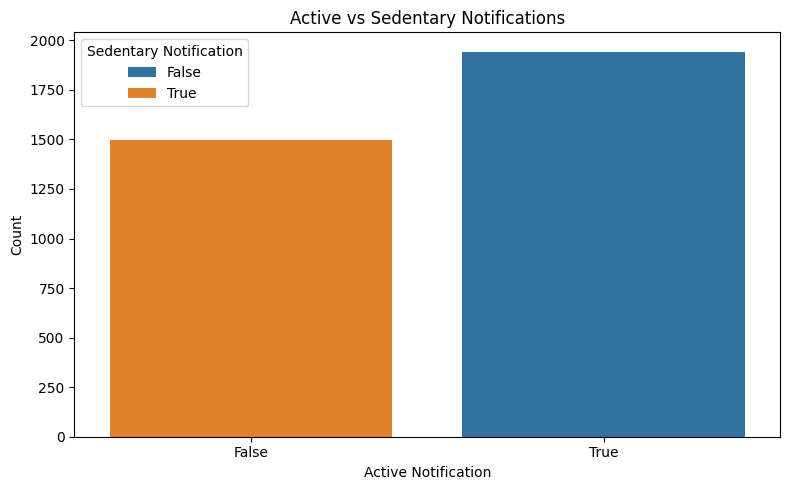

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='send.active', hue='send.sedentary')
plt.title('Active vs Sedentary Notifications')
plt.xlabel('Active Notification')
plt.ylabel('Count')
plt.legend(title='Sedentary Notification')
plt.tight_layout()
plt.show()

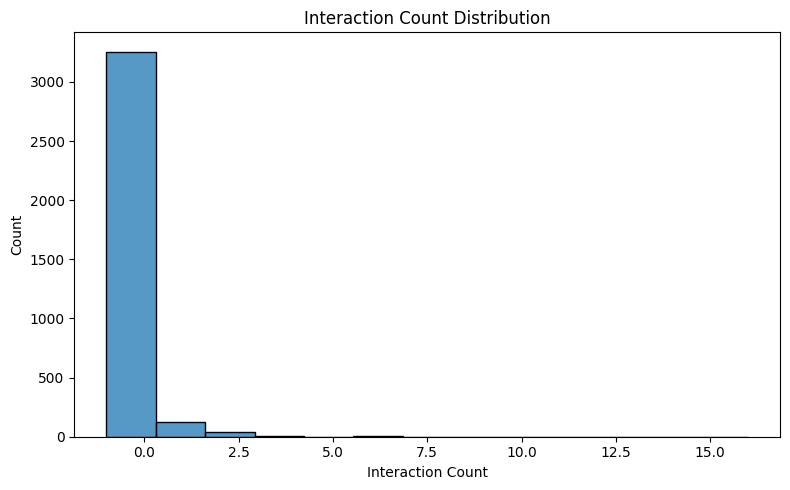

In [46]:
plt.figure(figsize=(8, 5))
sns.histplot(data['interaction.count'].dropna(), kde=False)
plt.title('Interaction Count Distribution')
plt.xlabel('Interaction Count')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


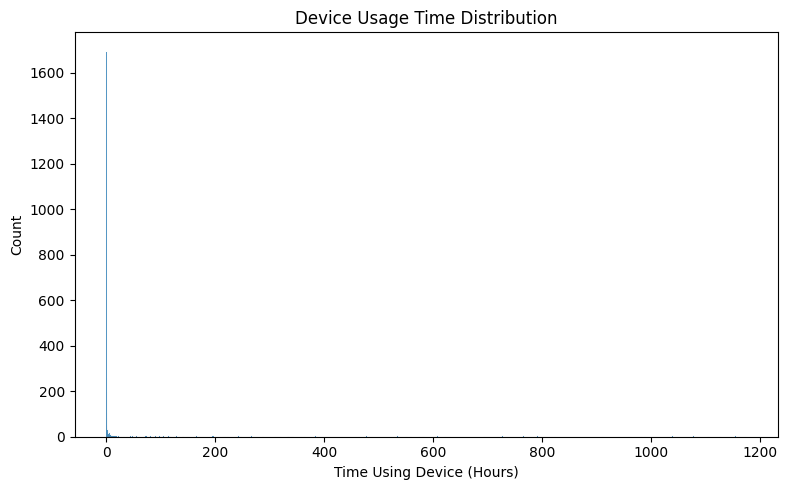

In [47]:
plt.figure(figsize=(8, 5))
sns.histplot(data['sugg.device.since'].dropna(), kde=False)
plt.title('Device Usage Time Distribution')
plt.xlabel('Time Using Device (Hours)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

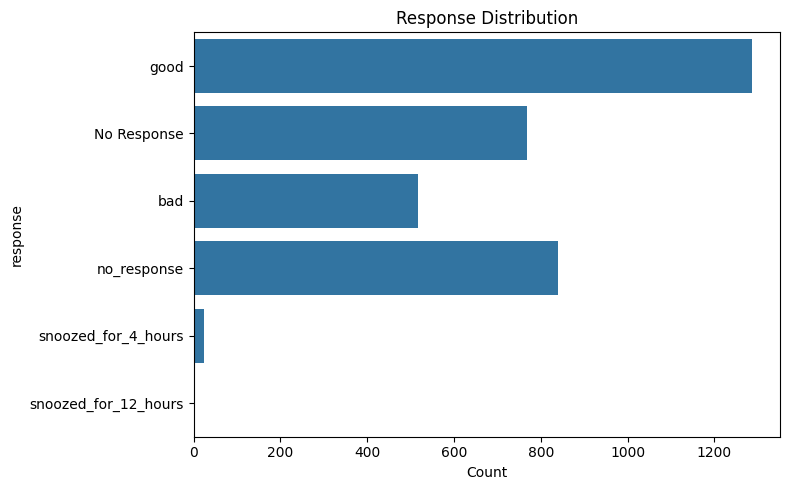

In [48]:
plt.figure(figsize=(8, 5))
sns.countplot(y=data['response'])
plt.title('Response Distribution')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

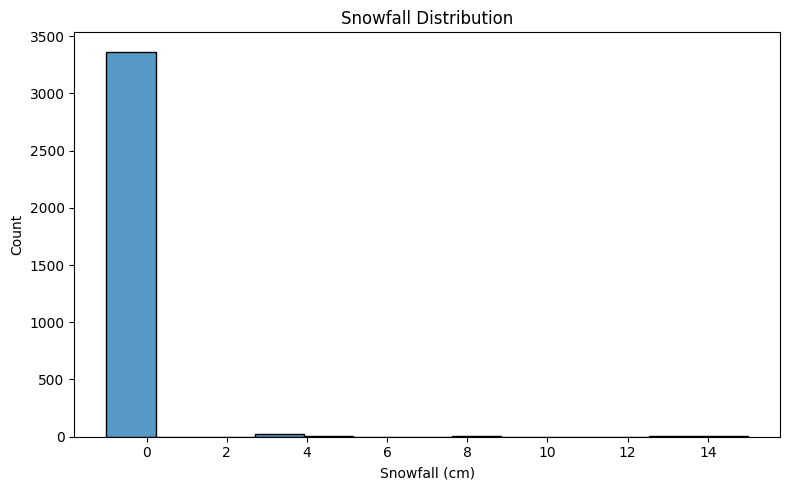

In [50]:
plt.figure(figsize=(8, 5))
sns.histplot(data['dec.snow'].dropna(), kde=False)
plt.title('Snowfall Distribution')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

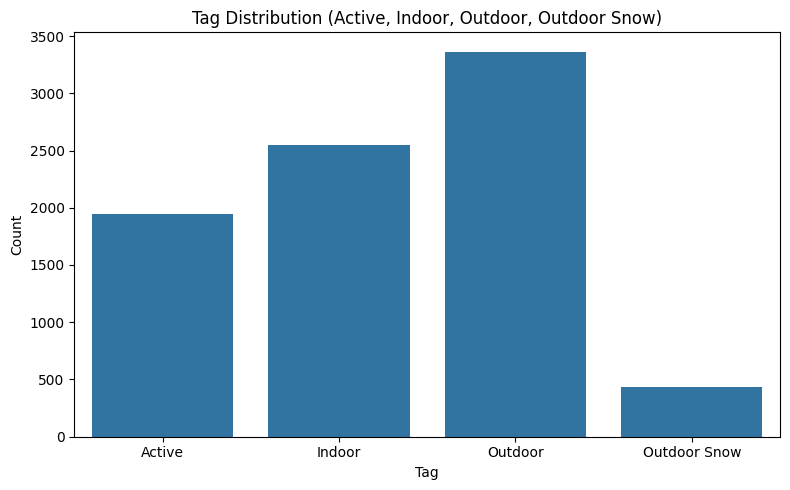

In [51]:
tag_data = pd.DataFrame({
    'Tag': ['Active', 'Indoor', 'Outdoor', 'Outdoor Snow'],
    'Count': [
        data['tag.active'].sum(),
        data['tag.indoor'].sum(),
        data['tag.outdoor'].sum(),
        data['tag.outdoor_snow'].sum()
    ]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Tag', y='Count', data=tag_data)
plt.title('Tag Distribution (Active, Indoor, Outdoor, Outdoor Snow)')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

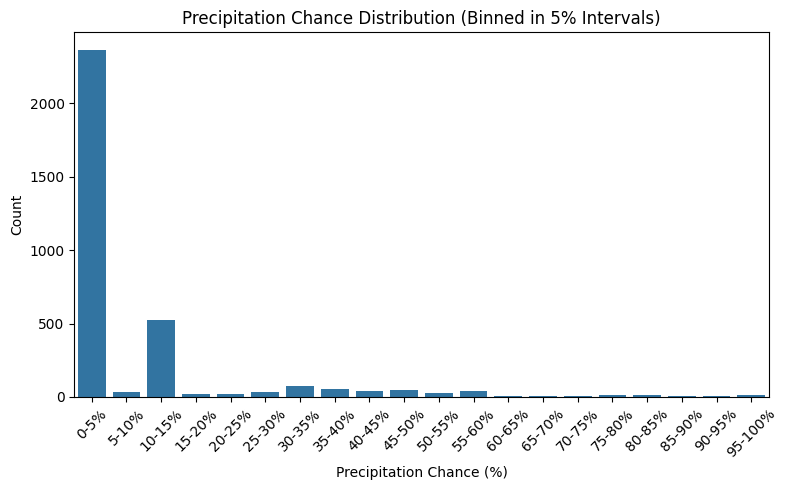

In [52]:
data['dec.precipitation.chance'] = pd.to_numeric(data['dec.precipitation.chance'], errors='coerce')

bins = range(0, 105, 5)  
labels = [f'{i}-{i+5}%' for i in range(0, 100, 5)]
data['precipitation_binned'] = pd.cut(data['dec.precipitation.chance'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 5))
sns.countplot(x='precipitation_binned', data=data)
plt.title('Precipitation Chance Distribution (Binned in 5% Intervals)')
plt.xlabel('Precipitation Chance (%)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()